In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [17]:
train.shape

(1804874, 45)

In [30]:
test = pd.read_csv('test.csv')

In [19]:
test.head()

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...


In [20]:
test.shape

(97320, 2)

In [21]:
## we need target and comment_text column only. Select target and comment_text column from train dataframe

In [4]:
train = train[['target','comment_text']]

# EDA

In [5]:
# distribution of word count of comment_text of train dataframe

In [6]:
word_count = train['comment_text'].str.split().apply(len).value_counts().sort_index()

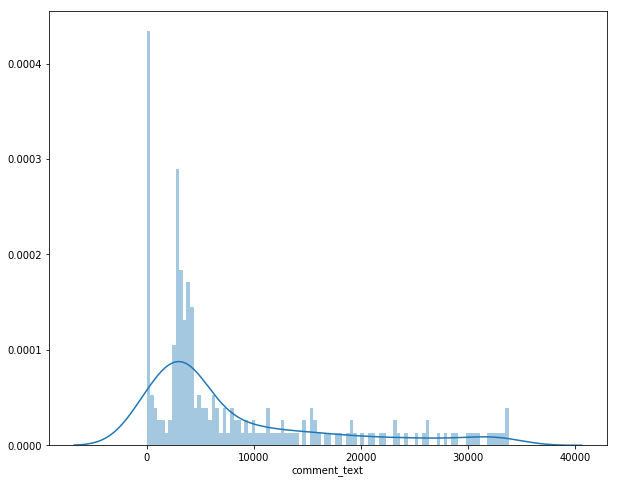

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(word_count, bins=100, ax=ax)

In [13]:
# distribution of word count of comment_text of test dataframe

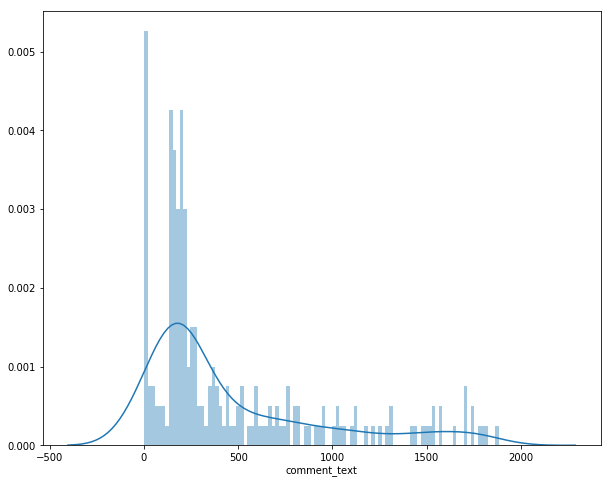

In [14]:
word_count = test['comment_text'].str.split().apply(len).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(word_count, bins=100, ax=ax)

In [15]:
# distribution of length of comment_text of train dataframe

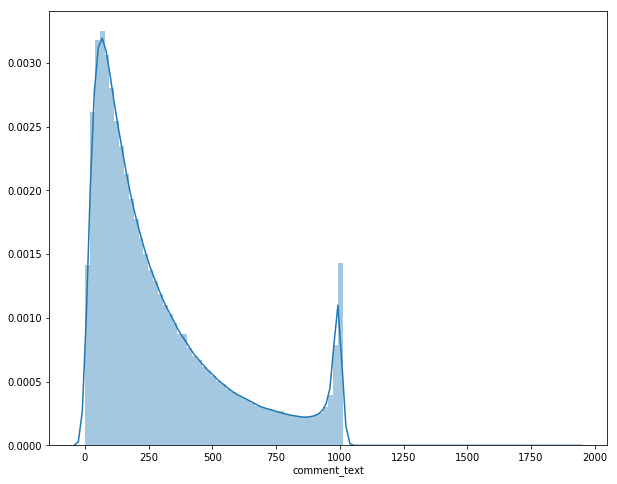

In [16]:
text_length = train['comment_text'].apply(lambda x : len(x))
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(text_length, bins=100, ax=ax)

In [17]:
# distribution of length of comment_text of test dataframe

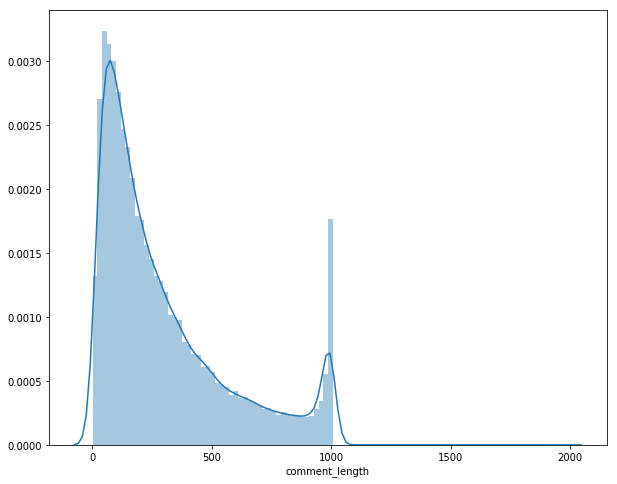

In [18]:
test['comment_length'] = test['comment_text'].apply(lambda x : len(x))
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(test['comment_length'], bins=100, ax=ax)

In [ ]:
## Distribution of targets

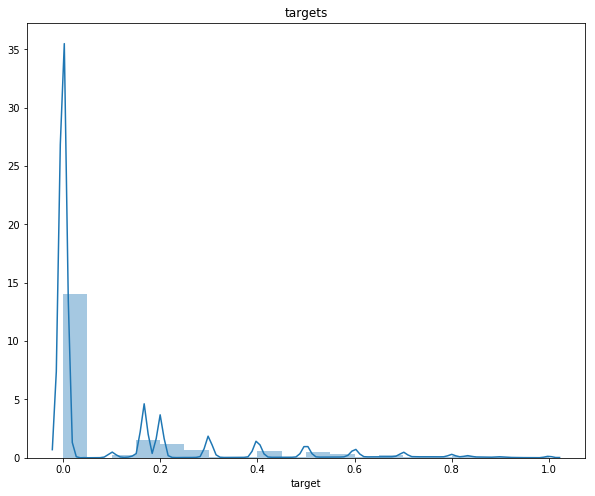

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(train['target'], bins=20, ax=ax).set_title("targets")
plt.show()

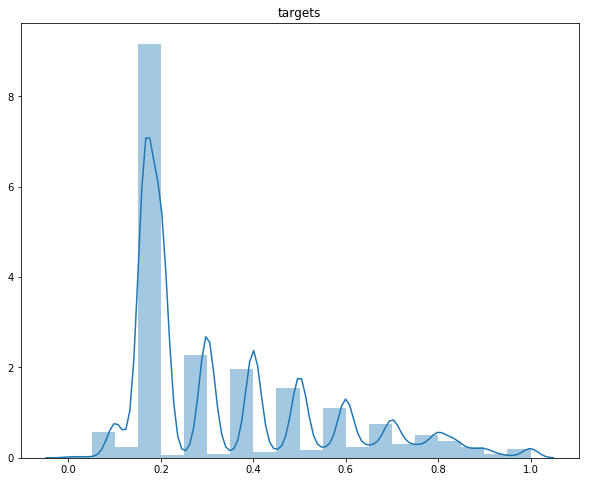

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(train[train['target'] > 0]['target'].values, bins=20, ax=ax).set_title("targets")
plt.show()

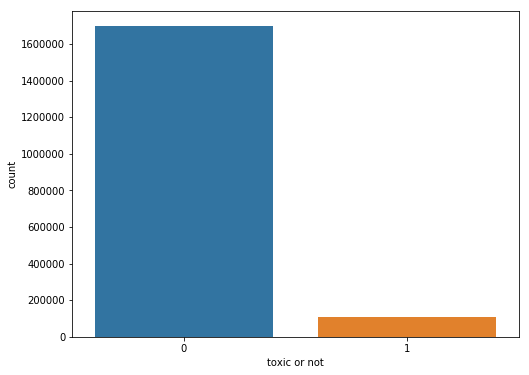

In [21]:
train['toxic or not'] = train['target'].apply(lambda x : 1 if (x > 0.5) else 0)
plt.figure(figsize=(8, 6))
sns.countplot(train['toxic or not'])
plt.show()

# Preprocessing

In [ ]:
## convert text into lower case

In [7]:
train['comment_text'] = train['comment_text'].str.lower()

In [8]:
### Remove punctations
def remove_punc(data):
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean(text,punct):
        for p in punct:
            text = text.replace(p,'')
        return text
    data = data.astype(str).apply(lambda x: clean(x, punct))
    return data

In [9]:
X = remove_punc(train['comment_text'])

In [10]:
y = np.where(train['target'] >= 0.5, True, False) * 1

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer()

In [13]:
X_train = Vectorizer.fit_transform(X_train)
X_test = Vectorizer.transform(X_test)

In [31]:
test= Vectorizer.transform(test['comment_text'])

# Models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
from sklearn import preprocessing
x_train = preprocessing.normalize(X_train)
x_test = preprocessing.normalize(X_test)

In [19]:
model = LogisticRegression(C=5, random_state=42,solver='sag',max_iter=1000,n_jobs=-1)
model.fit(x_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

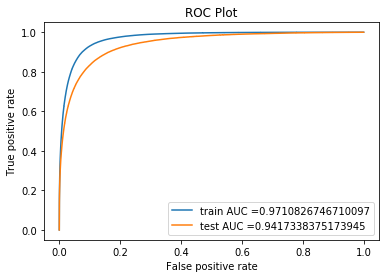

In [22]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Plot")
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    497834
           1       0.76      0.50      0.60     43629

   micro avg       0.95      0.95      0.95    541463
   macro avg       0.86      0.74      0.79    541463
weighted avg       0.94      0.95      0.94    541463



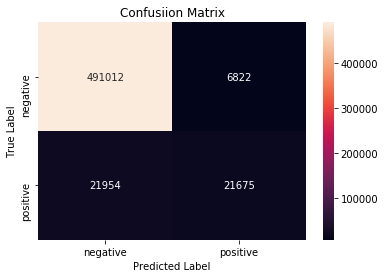

In [24]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [32]:
lr_predictions = model.predict_proba(test)[:,1]

In [49]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
y_pred = model.predict(x_test)

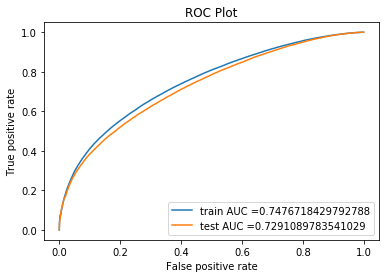

In [51]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Plot")
plt.show()

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    497834
           1       0.92      0.01      0.02     43629

   micro avg       0.92      0.92      0.92    541463
   macro avg       0.92      0.51      0.49    541463
weighted avg       0.92      0.92      0.88    541463



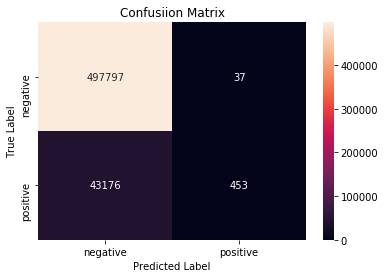

In [53]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
naive_predictions = model.predict_proba(test)[:,1]

In [ ]:
3) Support Vector Machine

In [28]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(x_train, y_train)

/home/lab12/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
y_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import roc_curve,auc
probas_ = model.fit(x_train, y_train).decision_function(x_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_)   

In [37]:
probas_ = model.fit(x_train, y_train).decision_function(x_train)
# Compute ROC curve and area the curve
fpr_, tpr_, thresholds = roc_curve(y_train, probas_)   

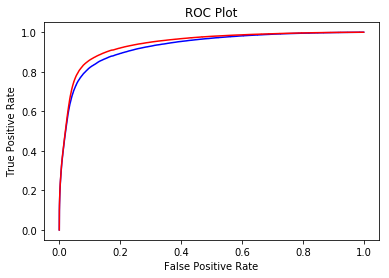

In [38]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label="test AUC ="+str(auc(fpr, tpr)))
plt.plot(fpr_, tpr_, 'r',label="train AUC ="+str(auc(fpr_, tpr_)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Plot")
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
acuracy = roc_auc_score(y_pred,y_test)
acuracy

0.9430274694384839

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    497834
           1       0.96      0.10      0.18     43629

   micro avg       0.93      0.93      0.93    541463
   macro avg       0.94      0.55      0.57    541463
weighted avg       0.93      0.93      0.90    541463



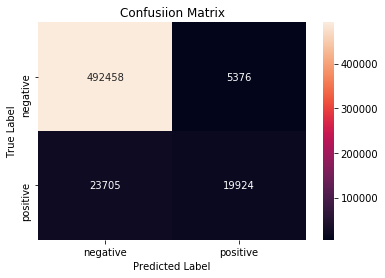

In [43]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [15]:
X = remove_punc(train['comment_text'])
y = np.where(train['target'] >= 0.5, True, False) * 1

In [16]:
# Splitting the data into 50-50 train_data and test_data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [17]:
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [18]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(list(X))

In [22]:
# Finding all words in the vocabulary
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() 
count_vect.fit(X)

vocabulary = count_vect.get_feature_names()
print('No. of words in the Vocabulary : ',len(vocabulary))

No. of words in the Vocabulary :  628014


In [19]:
max_features = len(tokenizer.word_index) + 1
max_features

638213

In [20]:
x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

In [21]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [22]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
# fix random seed for reproducibility
np.random.seed(7)

In [23]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [24]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(max_features, 256))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         163382528 
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 163,525,429
Trainable params: 163,525,429
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
x_test.shape

(541463, 100)

In [28]:
y_test.shape

(541463,)

In [30]:
# Fitting the data to the model
history = model.fit(x_train, y_train,epochs=10, batch_size=512 ,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.


/home/lab12/.local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:107: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 163382528 elements. This may consume a large amount of memory.
  num_elements)
/home/lab12/.local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:107: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 163382528 elements. This may consume a large amount of memory.
  num_elements)


Train on 1263411 samples, validate on 541463 samples
Epoch 1/10
1263411/1263411 [==============================] - 7504s 6ms/step - loss: 0.1497 - acc: 0.9459 - val_loss: 0.1344 - val_acc: 0.9489
Epoch 2/10
1263411/1263411 [==============================] - 6625s 5ms/step - loss: 0.1168 - acc: 0.9542 - val_loss: 0.1365 - val_acc: 0.9486
Epoch 3/10
1263411/1263411 [==============================] - 6570s 5ms/step - loss: 0.0921 - acc: 0.9640 - val_loss: 0.1494 - val_acc: 0.9455
Epoch 4/10
1263411/1263411 [==============================] - 6563s 5ms/step - loss: 0.0666 - acc: 0.9741 - val_loss: 0.1791 - val_acc: 0.9416
Epoch 5/10
1263411/1263411 [==============================] - 6564s 5ms/step - loss: 0.0459 - acc: 0.9823 - val_loss: 0.2202 - val_acc: 0.9379
Epoch 6/10
1263411/1263411 [==============================] - 6567s 5ms/step - loss: 0.0318 - acc: 0.9879 - val_loss: 0.2718 - val_acc: 0.9378
Epoch 7/10
1263411/1263411 [==============================] - 6569s 5ms/step - loss: 0.02

Test loss: 0.42340008496795717
Test accuracy: 0.9327359394824761


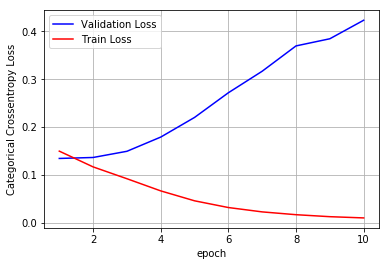

In [32]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 10

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [26]:
submission = pd.read_csv("sample_submission.csv")

In [28]:
lr_predictions

array([0.02679297, 0.0136606 ])

In [33]:
submission['prediction'] = lr_predictions
submission.to_csv('submission.csv', index=False)

In [34]:
submission.head()

,id,prediction
0,7000000,0.024610
1,7000001,0.008586
2,7000002,0.014763
3,7000003,0.003575
4,7000004,0.974616


## Conclusion:

In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["MOdel","AUC"]

x.add_row(["Logistic Regression","94.44%"])
x.add_row(["Naive Bayes","72.91%"])
x.add_row(["Support Vector Machine","94.30%"])
x.add_row(["LSTM","93.27%"])

print(x)

+------------------------+--------+
|         MOdel          |  AUC   |
+------------------------+--------+
|  Logistic Regression   | 94.44% |
|      Naive Bayes       | 72.91% |
| Support Vector Machine | 94.30% |
|          LSTM          | 93.27% |
+------------------------+--------+
